** Évaluer la structure des données** <br/>
Dans cette section, nous allons examiner l'ensemble de données en général et chaque colonne en détail pour mieux comprendre les données d'entrée afin d'agréger les champs si nécessaire.
À partir des méthodes de tête et de colonne, nous avons une idée qu'il s'agit d'un ensemble de données de désabonnement des clients de télécommunications où chaque enregistrement implique la nature de l'abonnement, l'ancienneté, la fréquence de paiement et le désabonnement (signifiant leur statut actuel).

# Section A: Prétraitement des données:
**Étape 0 : Redémarrez la session** <br/>
Supprimez toutes les variables temporaires de l'environnement de développement interactif avant de commencer à coder.




In [7]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass


**Étape 1 : Importer les bibliothèques pertinentes**  <br/>
importez toutes les bibliothèques Python pertinentes pour créer des algorithmes d'apprentissage automatique supervisé.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

**Étape 2 : Configurez le répertoire de travail actuel**

In [9]:
os.chdir(r"C:/Users/Msi/machine learning/Predict Customer Churn/")

**Étape 3 : Importer l'ensemble de données**  <br/>
Chargeons l'ensemble de données d'entrée dans le bloc-notes python dans le répertoire de travail actuel.

In [10]:
dataset = pd.read_csv('1.Input/customer_churn_data.csv')

In [11]:
dataset.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Une méthode de description rapide révèle que les clients des télécommunications restent en moyenne 32 mois et paient 64 $ par mois.

In [13]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


À première vue, nous pouvons supposer que l'ensemble de données contient plusieurs colonnes numériques et catégorielles fournissant diverses informations sur les transactions des clients.

In [14]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Re-validate column data types and missing values:** <br/>
Les valeurs manquantes pourraient gâcher la construction et la précision du modèle. Par conséquent, nous devons nous occuper des valeurs manquantes avant de comparer et de sélectionner un modèle.

In [15]:
dataset.columns.to_series().groupby(dataset.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

L'ensemble de données contient 7043 lignes et 21 colonnes et il ne semble pas y avoir de valeurs manquantes dans l'ensemble de données.

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

**Identifiez des valeurs uniques :** <br/> "Payment Methods" et "Contract" sont deux variables catégorielles de l'ensemble de données. Lorsque nous examinons les valeurs uniques de chaque variable catégorique, nous obtenons un aperçu que les clients sont soit sur un contrat glissant de mois en mois, soit sur un contrat fixe pour un ou deux ans. En outre, ils paient leurs factures par carte de crédit, virement bancaire ou chèques électroniques.

In [18]:
#Unique values in each categorical variable:
dataset["PaymentMethod"].nunique()
dataset["PaymentMethod"].unique()
dataset["Contract"].nunique()
dataset["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Étape 5 : Vérifiez la distribution de la variable cible :** <br/>
L'ensemble de données est déséquilibré avec une forte proportion de clients actifs par rapport à ceux qui sont inactifs.

In [19]:
dataset["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**Étape 6 : Nettoyer l'ensemble de données**

In [20]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors='coerce')
dataset['TotalCharges'] = dataset['TotalCharges'].astype("float")

**Étape 7 : Prenez soin des données manquantes** <br/>
les données fournies n'ont pas de valeurs manquantes et cette étape n'est donc pas requise pour l'ensemble de données choisi. Je voudrais présenter les étapes ici pour toutes les références futures.

In [21]:
dataset.info()
dataset.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

**Trouvez la moyenne et remplissez les valeurs manquantes:**  <br/>
Nous devrions trouver la moyenne de chacune de ces colonnes et remplir leurs valeurs manquantes. Voici un extrait de code pour effectuer la même étape par programmation.

In [22]:
na_cols = dataset.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in dataset.columns[1:]:
     if col in na_cols:
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(dataset[col].mean()).round(0)

**Revalider les NA :**  <br/>
C'est toujours une bonne pratique de revalider et de s'assurer que nous n'avons plus de valeurs nulles dans l'ensemble de données.


In [23]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


**Étape 8 : étiqueter les données binaires d'encodage :**  <br/> 
les algorithmes d'apprentissage automatique ne peuvent généralement avoir que des valeurs numériques comme variables indépendantes. Par conséquent, l'encodage des étiquettes est tout à fait essentiel car ils encodent les étiquettes catégorielles avec des valeurs numériques appropriées. 


In [24]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


**Section B: Data Evaluation** <br/> 
**Etape 9:L'analyse des données:** <br/>
**Etape 9.1. Tracage de l'histogramme des colonnes numériques:**<br/>
-La répartition par sexe montre que l'ensemble de données présente une proportion relativement égale de clients masculins et féminins. Près de la moitié des clients de notre ensemble de données sont des femmes tandis que l'autre moitié sont des hommes.<br/>
-La plupart des clients de l'ensemble de données sont des jeunes.<br/>
-Peu de clients semblent avoir des organisations alors que près de la moitié des clients ont un partenaire.<br/>
-Il y a beaucoup de nouveaux clients dans l'organisation (moins de 10 mois) suivis d'un segment de clients fidèles qui restent plus de 70 mois en moyenne.<br/>
-La plupart des clients semblent avoir un service téléphonique et 3/4 d'entre eux ont opté pour la facturation sans papier<br/>
-Les frais mensuels s'étendent entre 18 $ et 118 $ par client avec une énorme proportion de clients sur le segment de 20 $.

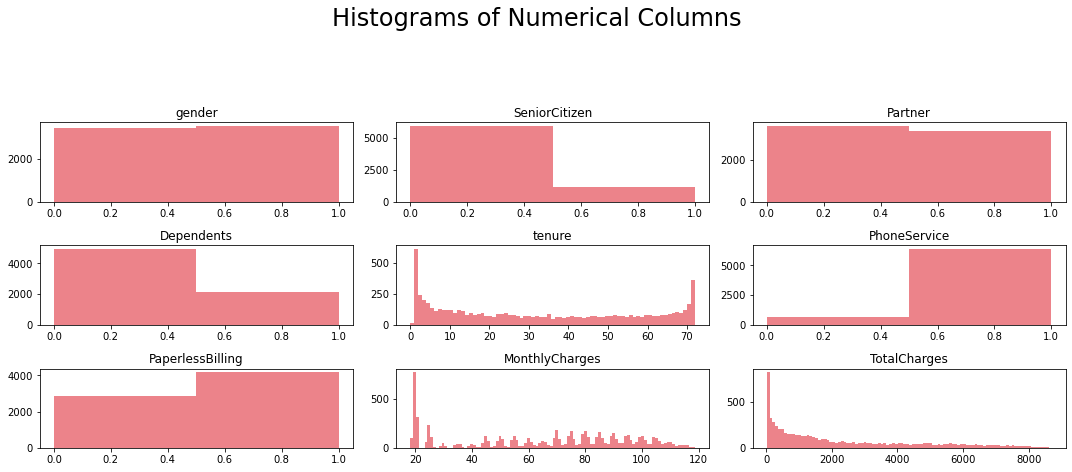

In [25]:
dataset2 = dataset[['gender', 
'SeniorCitizen', 'Partner','Dependents',
'tenure', 'PhoneService', 'PaperlessBilling',
'MonthlyCharges', 'TotalCharges']]
#Histogram:
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

**Étape 9.2. Analysez la distribution des variables catégorielles :** <br/>
**9.2.1. Répartition du type de contrat :** <br/> La plupart des clients semblent avoir une connexion prépayée avec la société de télécommunications. En revanche, on retrouve une proportion à peu près égale de clients dans les contrats 1 an et 2 ans.

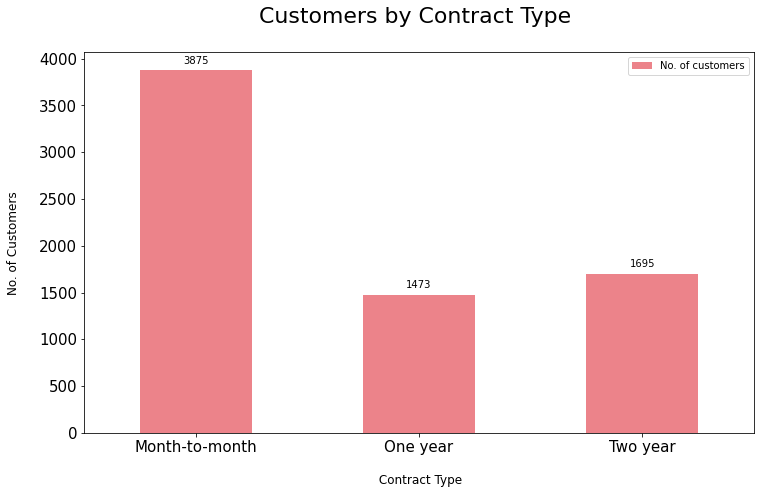

In [26]:
contract_split = dataset[[ "customerID", "Contract"]]
sectors = contract_split .groupby ("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)
ax =  contract_split[["No. of customers"]].plot.bar(title = 'Customers by Contract Type',legend =True, table = False, 
grid = False,  subplots = False,figsize =(12, 7), color ='#ec838a', 
fontsize = 15, stacked=False)
plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Contract Type \n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
x_labels = np.array(contract_split[["No. of customers"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        
        ax.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)  
        
add_value_labels(ax)

**Analyse exploratoire des données - conclusion:** <br/>
-L'ensemble de données ne contient aucune valeur de données manquante ou erronée.<br/>
-La corrélation positive la plus forte avec les caractéristiques cibles est les charges mensuelles et l'âge, tandis que la corrélation négative est avec le partenaire, les personnes à charge et l'ancienneté.<br/>
-L'ensemble de données est déséquilibré, la majorité des clients étant actifs.<br/>
-Il existe une multicolinéarité entre les frais mensuels et les frais totaux. La baisse des charges totales a considérablement réduit les valeurs VIF.<br/>
-La plupart des clients de l'ensemble de données sont des jeunes.<br/>
-Il y a beaucoup de nouveaux clients dans l'organisation (moins de 10 mois) suivis d'une clientèle fidèle de plus de 70 mois.<br/>
-La plupart des clients semblent avoir un service téléphonique avec des frais mensuels allant de 18 $ à 118 $ par client.<br/>
-Les clients disposant d'une connexion mensuelle ont une très forte probabilité de le faire également s'ils ont souscrit au paiement par chèque électronique<br/>


**Étape 10 : Encoder les données catégorielles** <br/>
Toute variable catégorique qui a plus de deux valeurs uniques a été traitée avec Label Encoding et one-hot Encoding en utilisant la méthode get_dummies dans pandas ici.

In [27]:
#si user_id est un objet :
    
identity = dataset["customerID"]
dataset = dataset.drop(columns="customerID")
#Convertir le reste de la variable catégorique en variable fictive :
dataset= pd.get_dummies(dataset)
#Rejoindre l'ID utilisateur à l'ensemble de données :
dataset = pd.concat([dataset, identity], axis = 1)

**Étape 11 : Divisez l'ensemble de données en variables dépendantes et indépendantes ** <br/>

Nous devons maintenant séparer l'ensemble de données en valeurs X et y. y serait la colonne "Churn" tandis que X serait la liste restante des variables indépendantes dans l'ensemble de données.

In [28]:
#Identifiez la variable de réponse :
response = dataset["Churn"]
dataset = dataset.drop(columns="Churn")

**Étape 12 : Générer des ensembles de données de train et de test :** <br/>
découplons l'ensemble de données principal en ensemble train et de test avec un ratio de 80 % à 20 %.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response, stratify=response, test_size = 0.2)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)





Number transactions X_train dataset:  (5634, 41)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 41)
Number transactions y_test dataset:  (1409,)


**Étape 13 : Supprimer les identifiants :** <br/>
Séparez ‘customerID’ des trames de données de training et de test.

In [30]:
train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])
test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

**Étape 14 : Effectuer la mise à l'échelle des fonctionnalités** <br/>
Il est très important de normaliser les variables avant d'effectuer des algorithmes d'apprentissage automatique (classification) afin que toutes les variables d'apprentissage et de test soient mises à l'échelle dans une plage de 0 à 1.

In [31]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

**Section C: Model Selection** <br/>
Étape 15.1 : Comparer les algorithmes de classification de base (1ère itération) : Modélisons chaque algorithme de classification sur l'ensemble de données d'apprentissage et évaluons leur précision et leurs scores d'écart type.
La précision de la classification est l'une des mesures d'évaluation de la classification les plus courantes pour comparer les algorithmes de base, car il s'agit du nombre de prédictions correctes faites en tant que rapport des prédictions totales. Cependant, ce n'est pas la métrique idéale lorsque nous avons un problème de déséquilibre de classe. Par conséquent, trions les résultats en fonction de la valeur "Mean AUC" qui n'est rien d'autre que la capacité du modèle à faire la distinction entre les classes positives et négatives.

In [32]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = None,
                                                         class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = None)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = None)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = None)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = None)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.16,1.38,74.28,1.25
1,SVC,82.91,1.55,79.66,1.46
6,Random Forest,82.01,1.78,78.79,1.23
4,Gaussian NB,81.25,1.91,69.35,1.16
2,Kernel SVM,79.87,1.98,79.68,1.15
3,KNN,76.94,2.25,75.74,1.49
5,Decision Tree Classifier,66.20,1.83,73.31,1.70


**Étape 15.2. Visualisez les comparaisons de précision des algorithmes de classification :** <br/>
En utilisant l'accuracy mean

No handles with labels found to put in legend.


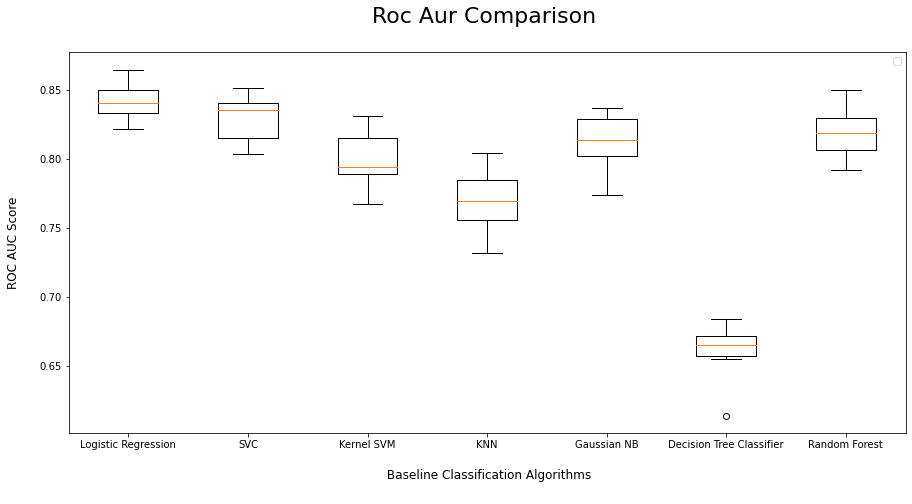

In [34]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Roc Aur Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

**Section D: Model Evaluation** <br/>
Étape 16 : Entraîner et évaluer le modèle choisi : Ajustons le modèle sélectionné (régression logistique dans ce cas) sur l'ensemble de données d'entraînement et évaluons les résultats.


In [35]:
classifier = LogisticRegression(random_state = 0,
penalty = 'l2')
classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = classifier.predict(X_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression',
acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.802697   0.652866  0.548128   0.59593  0.566298


K-Fold Cross-Validation: L'évaluation du modèle est le plus souvent effectuée par la technique de «K-fold Cross-Validation» qui nous aide principalement à corriger la variance. Un problème de variance se produit lorsque nous obtenons une bonne précision lors de l'exécution du modèle sur un ensemble d'apprentissage et un ensemble de test, mais que la précision semble différente lorsque le modèle est exécuté sur un autre ensemble de test.
Ainsi, afin de résoudre le problème de variance, la validation croisée k-fold divise essentiellement l'ensemble d'apprentissage en 10 plis et entraîne le modèle sur 9 plis (9 sous-ensembles de l'ensemble de données d'apprentissage) avant de le tester sur le pli de test. Cela nous donne la flexibilité de former notre modèle sur les dix combinaisons de 9 plis ; donnant amplement de place pour finaliser la variance.

In [36]:
accuracies = cross_val_score(estimator = classifier,
 X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), 
accuracies.std() * 2))


Logistic Regression Classifier Accuracy: 0.80 (+/- 0.03)


Par conséquent, nos résultats de validation croisée k-fold indiquent que nous aurions une précision entre 76 % et 84 % lors de l'exécution de ce modèle sur n'importe quel ensemble de test.

**Visualisez les résultats sur une matrice de confusion :** <br/>
La matrice de confusion indique que nous avons 208+924 prédictions correctes et 166+111 prédictions incorrectes. <br/>
Taux de précision = nombre de prédictions correctes/total des prédictions * 100 <br/>
Taux d'erreur = Nombre de prédictions erronées / prédictions totales * 100  <br/>
Nous avons une précision de 80 % ; signalant les caractéristiques d'un modèle raisonnablement bon.

Text(0.5, 16.0, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

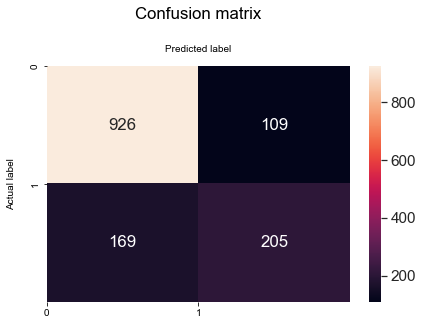

In [37]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

**Évaluer le modèle à l'aide du graphe ROC** <br/>
Il est bon de réévaluer le modèle à l'aide de ROC Graph. Le graphique ROC nous montre la capacité d'un modèle à distinguer les classes en fonction du score AUC Mean. La ligne orange représente la courbe ROC d'un classificateur aléatoire tandis qu'un bon classificateur essaie de rester aussi loin que possible de cette ligne. Comme le montre le graphique ci-dessous, le modèle de régression logistique affiné a présenté un score AUC plus élevé.

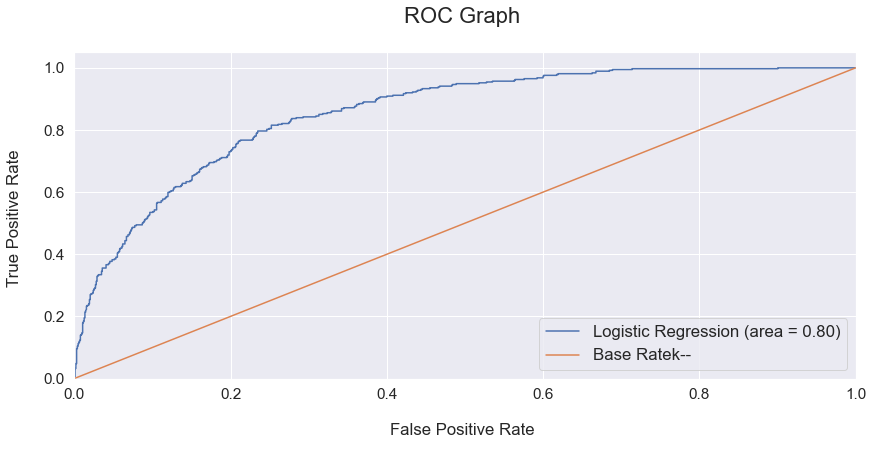

In [38]:
classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, 
label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

**Étape 17 : Prédire l'importance des fonctionnalités : ** <br/>

La régression logistique nous permet de déterminer les caractéristiques clés qui ont une importance dans la prédiction de l'attribut cible ("Churn" dans ce projet).
Le modèle de régression logistique prédit que le taux de désabonnement augmenterait positivement avec le contrat mensuel, le service Internet par fibre optique, les chèques électroniques, l'absence de sécurité de paiement et de support technique.
D'autre part, le modèle prédit une corrélation négative avec le taux de désabonnement si un client a souscrit à la sécurité en ligne, un contrat d'un an ou s'il a opté pour les chèques postés comme moyen de paiement.

In [39]:
# Analyzing Coefficients
feature_importances = pd.concat([
pd.DataFrame(dataset.drop(columns = 'customerID').
columns, columns = ["features"]),
pd.DataFrame(np.transpose(classifier.coef_), 
columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
8,TotalCharges,0.503391
13,InternetService_Fiber optic,0.385140
33,Contract_Month-to-month,0.308045
32,StreamingMovies_Yes,0.166882
29,StreamingTV_Yes,0.155342
6,PaperlessBilling,0.150781
15,OnlineSecurity_No,0.116258
38,PaymentMethod_Electronic check,0.105801
24,TechSupport_No,0.098097
11,MultipleLines_Yes,0.078746


**Section E: Model Improvement**<br/>
L'amélioration du modèle consiste essentiellement à choisir les meilleurs paramètres pour le modèle d'apprentissage automatique que nous avons mis au point. Il existe deux types de paramètres dans tout modèle d'apprentissage automatique - le premier type est le type de paramètres que le modèle apprend ; les valeurs optimales trouvées automatiquement en exécutant le modèle. Le deuxième type de paramètres est celui que l'utilisateur peut choisir lors de l'exécution du modèle. Ces paramètres sont appelés les hyperparamètres ; un ensemble de valeurs configurables externes à un modèle qui ne peut pas être déterminé par les données, et que nous essayons d'optimiser grâce à des techniques de réglage des paramètres comme la recherche aléatoire ou la recherche par grille.

In [41]:
# Round 1:
 
# Select Regularization Method   
import time
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

Took 1.52 seconds


C:\Users\Msi\Anaconda3\envs\ING\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.67442692        nan 0.7132733         nan 0.72032147
        nan 0.72125196        nan 0.72168603        nan 0.72214014
        nan 0.72201936]
  category=UserWarning


(0.7221401350854547, {'C': 100, 'penalty': 'l2'})

**Section F: Future Predictions** <br/>



In [42]:
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = lr_classifier.predict(X_test)
#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['customerID', 'Churn', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results)

      customerID  Churn  predictions  propensity_to_churn(%) Ranking
6178  3719-TDVQB      0            0                    0.85      10
1789  2586-CWXVV      0            0                    9.80       7
3695  6088-BXMRG      0            1                   60.57       2
1179  5461-QKNTN      0            0                   40.09       3
2963  4707-YNOQA      0            0                    4.23       8
...          ...    ...          ...                     ...     ...
1730  3877-JRJIP      1            1                   59.98       2
5405  4097-YODCF      0            0                   31.95       4
2508  9405-GPBBG      0            0                    7.76       7
6216  7162-WPHPM      0            0                    0.66      10
6672  2346-CZYIL      0            0                    1.89       9

[1409 rows x 5 columns]
